<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/02_Neural_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.20.0


In [3]:
# Creating features
X=tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [4]:
# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

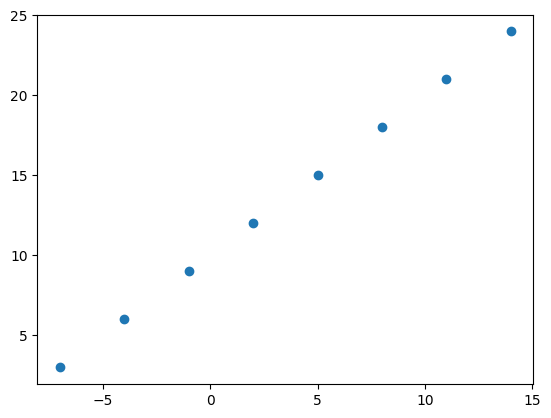

In [5]:
# Visulize it
plt.scatter(X,y)


# **Create a  demo tensor for our housing price prediction problem**

In [6]:
house_info=tf.constant(['bedroom','bathroom','garaage'])
house_price=tf.constant([971325])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garaage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([971325], dtype=int32)>)

In [7]:
input_shape=X.shape
output_shape=y.shape

input_shape,output_shape

(TensorShape([8]), (8,))

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>, np.float64(3.0))

# **Neural Net Building**

In [11]:
tf.random.set_seed(42)

# create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - loss: 8.9533 - mae: 8.9533
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.8208 - mae: 8.8208
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.6883 - mae: 8.6883
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5558 - mae: 8.5558
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.4233 - mae: 8.4233


In [12]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[25.108976]], dtype=float32)

# **Improve models perfromance**
HyperParameter Tuning


In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=101)

Epoch 1/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - loss: 13.6193 - mae: 13.6193
Epoch 2/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.1037 - mae: 13.1037
Epoch 3/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 12.5815 - mae: 12.5815
Epoch 4/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.0486 - mae: 12.0486
Epoch 5/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.4804 - mae: 11.4804
Epoch 6/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 10.8689 - mae: 10.8689
Epoch 7/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.1780 - mae: 10.1780
Epoch 8/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.3884 - mae: 9.3884
Epoch 9/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.4868 - mae: 8.4868
Epoch 10/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.4359 - mae: 7.4359
Epoch 11/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 6.3160 - mae: 6.3160
Epoch 12/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.9715 - mae: 4.9715
Epoch 13/101
1/1 ━━━━━━━━━━━━━━━

In [14]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[33.713264]], dtype=float32)

In [15]:
# again hyperparamter tuning

model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=90)

Epoch 1/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 192.9491 - mse: 192.9491
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 123.3551 - mse: 123.3551
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 47.6286 - mse: 47.6286
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 22.2215 - mse: 22.2215
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 76.2782 - mse: 76.2782
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 53.4706 - mse: 53.4706
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 21.3623 - mse: 21.3623
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 14.6351 - mse: 14.6351
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 21.3767 - mse: 21.3767
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 27.0988 - mse: 27.0988
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 26.5814 - mse: 26.5814
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 20.5742 - mse: 20.5742
Epoch 13/90
1/1 ━━━━━━━━━━━━━━━━━━

In [16]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[26.938023]], dtype=float32)

# **Making Dataset Bigger**

In [17]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

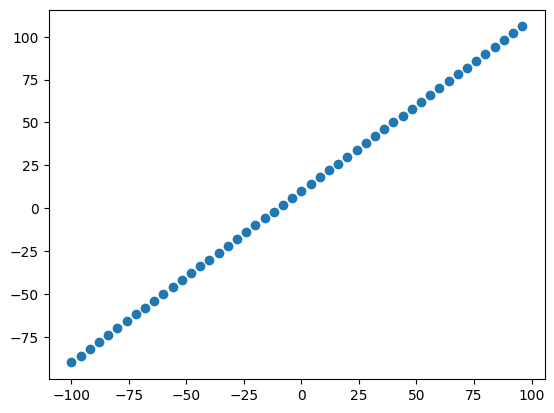

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# **Train Test Split**
* Three Sets
> Training , Validation and Test Set

In [20]:
# Split data into train and test set
len(X)

50

In [21]:
X_train=X[:40]   # 80% for training purpose
y_train=y[:40]

X_test=X[40:]   # 20 % for testing
y_test=y[40:]


# **Visualize the Data**

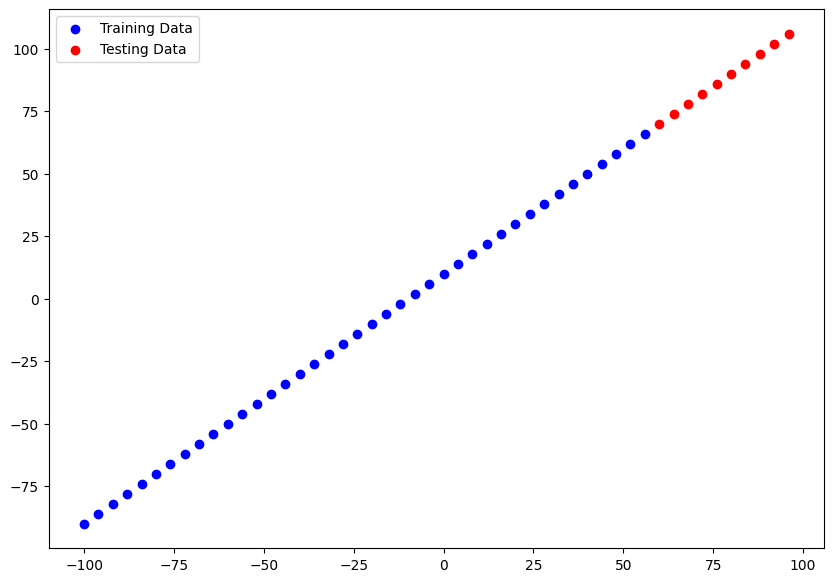

In [22]:
plt.figure(figsize=(10,7))

# plot training data
plt.scatter(X_train,y_train,c='b',label='Training Data')

# plot test data
plt.scatter(X_test,y_test,c='r',label='Testing Data')

plt.legend();

In [23]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.8328 - mae: 9.8328 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.1788 - mae: 8.1788
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.8198 - mae: 9.8198
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.1601 - mae: 8.1601
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.8069 - mae: 9.8069
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.1414 - mae: 8.1414
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7940 - mae: 9.7940
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.1227 - mae: 8.1227
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.7810 - mae: 9.7810
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.1041 - mae: 8.1041
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7681 - mae: 9.7681
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.0854 - mae: 8.0854
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
len(X_train)

40

In [27]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(40,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(20,name='hidden_layer1'),
    tf.keras.layers.Dense(10,name='hidden_laye2r'),
    tf.keras.layers.Dense(1,name='Output_Layer')
],name='model_1')

C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

In [29]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [30]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 40)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_laye2r (Dense)           │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[ 70.000175],
       [ 73.99992 ],
       [ 77.99967 ],
       [ 81.99942 ],
       [ 85.999176],
       [ 89.998924],
       [ 93.99867 ],
       [ 97.998436],
       [101.99819 ],
       [105.997955]], dtype=float32)

In [33]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_test,y_test,c='b',label='Testing Data')
  plt.scatter(X_train,y_train,c='g',label='Training Data')
  plt.plot(X_test,y_pred,c='r',label='Predictions')
  plt.legend();

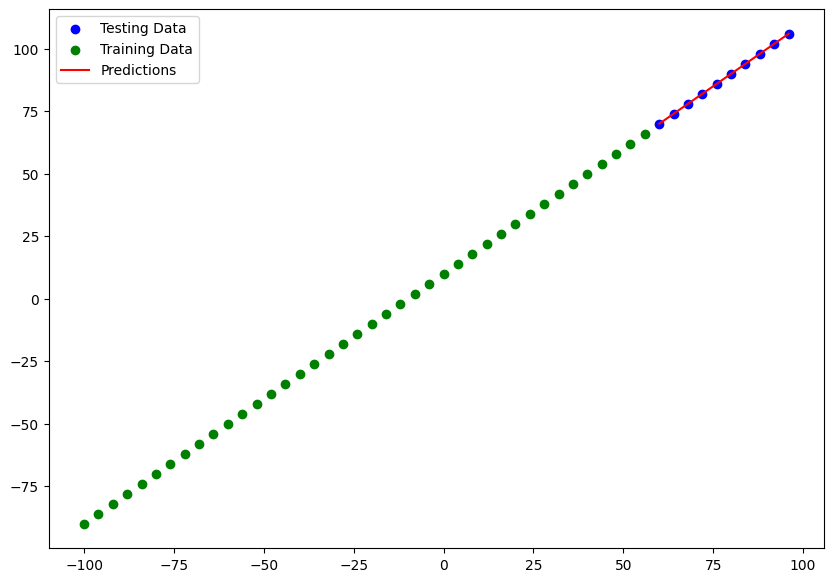

In [34]:
plot_predictions()

# **Evalvating Model**
MAE, MSE , HUBER

In [35]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 1.3975e-06 - mse: 1.3975e-06


[1.3975252386444481e-06, 1.3975252386444481e-06]

Mean Absolute Error

In [36]:
tf.keras.losses.MAE(y_test,tf.squeeze(y_pred)).numpy()

np.float32(0.0009803772)

Mean Squared Error

In [37]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred)).numpy()

np.float32(1.3975252e-06)

Some Functions to reuse MAE AND MSE

In [38]:
def mae(y_true,y_pred):
    return tf.keras.losses.MAE(y_true,tf.squeeze(y_pred))
def mse(y_true,y_pred):
    return tf.keras.losses.MSE(y_true,tf.squeeze(y_pred))

**Running Experiments to improve our model**

* get more data
* make model larger
* train model more longer

**Lets do 3 modelling experiments right now**

* model1: same as orignal 1 layer , 100 epochs
* model2: same as orignal 2 layer , 100 epochs
* model3: same as orignal 2 layer , 500 epochs

In [39]:
# model 1 

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_1.fit(X_train,y_train,epochs=100)


Epoch 1/100


C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 21.8617 - mae: 21.8617 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 21.7836 - mae: 21.7836
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21.7057 - mae: 21.7057
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.6278 - mae: 21.6278
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.5499 - mae: 21.5499
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.4721 - mae: 21.4721
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.3942 - mae: 21.3942
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.3163 - mae: 21.3163
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 21.2384 - mae: 21.2384
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21.1605 - mae: 21.1605
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.0826 - mae: 21.0826
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.0047 - mae: 21.0047
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


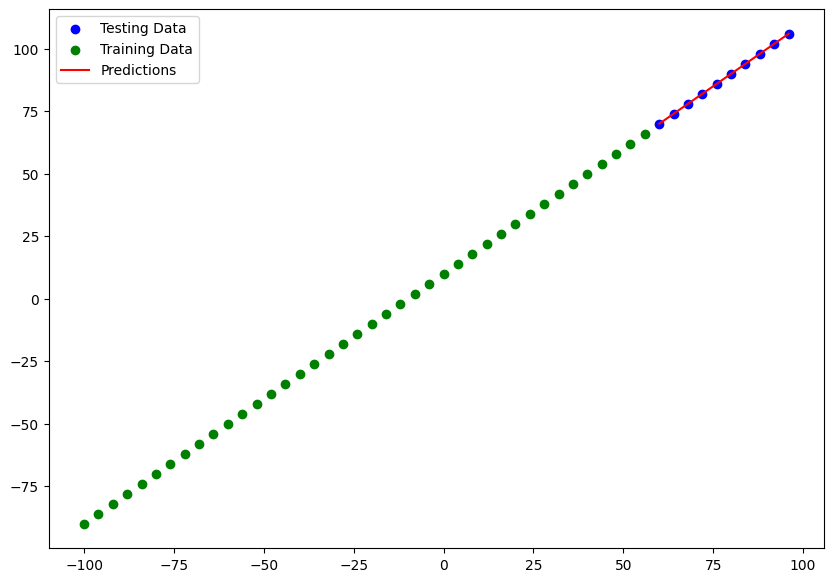

In [40]:
y_pred1=model_1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [41]:
mae_1=mae(y_test,y_pred1)
mse_1=mae(y_test,y_pred1)

In [42]:
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=7.392910957336426>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.392910957336426>)

In [43]:
# model2 
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1),
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_2.fit(X_test,y_test,epochs=100)

Epoch 1/100


C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step - loss: 173.6610 - mae: 173.6610
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 173.0892 - mae: 173.0892
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 172.5188 - mae: 172.5188
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 171.9497 - mae: 171.9497
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 171.3819 - mae: 171.3819
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 170.8155 - mae: 170.8155
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 170.2504 - mae: 170.2504
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 169.6868 - mae: 169.6868
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 169.1246 - mae: 169.1246
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 168.5638 - mae: 168.5638
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 168.0044 - mae: 168.0044
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 167.4465 - mae: 167.4465
Epoch 13/100

In [44]:
y_pred_2=model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


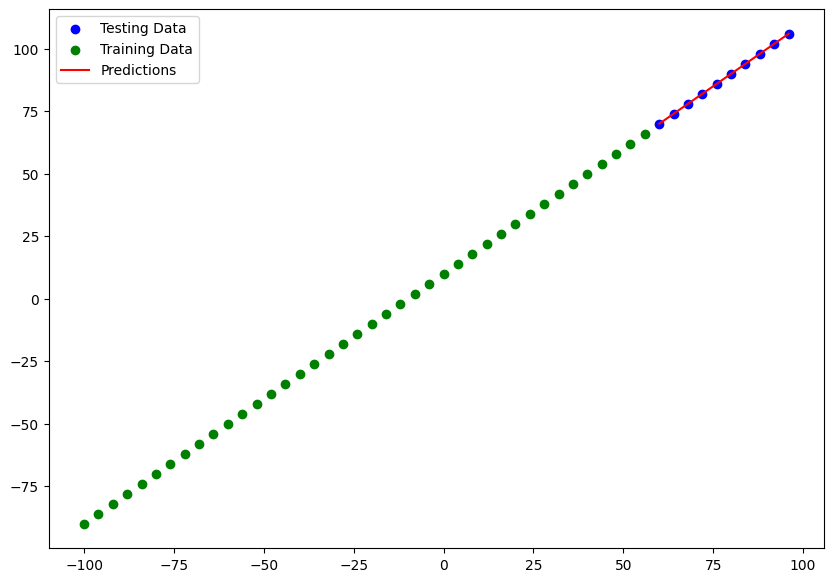

In [45]:
plot_predictions(predictions=y_pred_2)

In [46]:
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=122.17041015625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=15200.603515625>)

In [51]:
# Model3  layers 2 epochs 500
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 21.0144 - mae: 21.0144
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 20.2813 - mae: 20.2813 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 19.5592 - mae: 19.5592
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 18.8574 - mae: 18.8574
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 18.1570 - mae: 18.1570
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 17.4825 - mae: 17.4825 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 16.8296 - mae: 16.8296 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 16.2040 - mae: 16.2040 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 15.6029 - mae: 15.6029 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 15.0368 - mae: 15.0368 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 14.5152 - mae: 14.5152 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 14.0415 - mae: 14.0415
Epoch 13/500
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


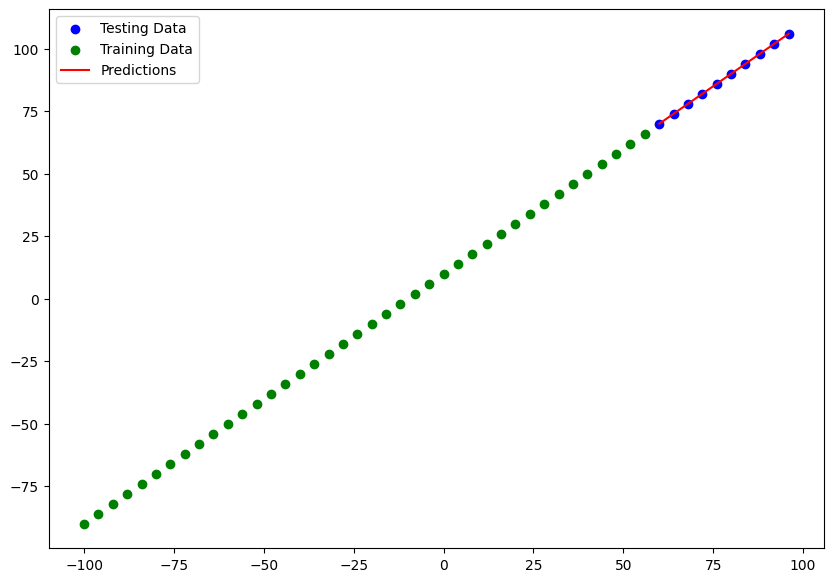

In [53]:
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [56]:
mae_3=mae(y_test,y_pred)
mse_3=mse(y_test,y_pred)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.000980377197265625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.3975252386444481e-06>)

Comparing the Results of our experiments

In [57]:
import pandas as pd

In [60]:
models_res=[
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(models_res,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,7.392911,7.392911
1,model_2,122.170410,15200.603516
2,model_3,0.000980,0.000001
